# Investigating Netflix Movies
A DataCamp Project in Python

By Madison Martin

<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

## Project Instructions
Perform exploratory data analysis on the netflix_data.csv data to understand more about movies from the 1990s decade.

What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called duration (use 1990 as the decade's start year).

A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as short_movie_count.

Feel free to experiment after submitting the project!

## My solution

In [28]:
# Import the necessary libraries and packages
import pandas as pd
import matplotlib.pyplot as plt

# Import the data
# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

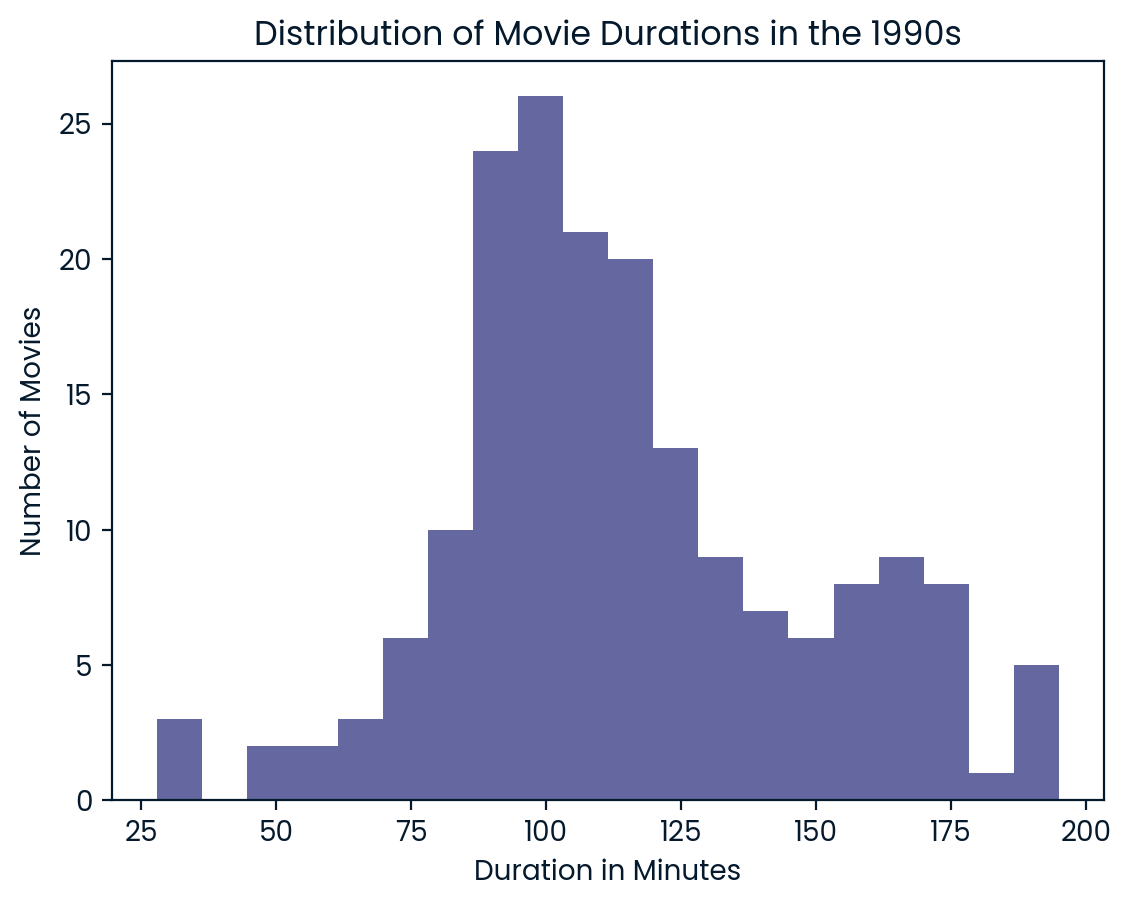

In [29]:
# What was the most frequent movie duration in the 1990's? 
# first, filter for movies only
movie_df = netflix_df[netflix_df["type"] == "Movie"]

# now filter for the 90s
afterninedf = movie_df[movie_df['release_year'] >= 1990] 
ninetysdf = afterninedf[afterninedf['release_year'] <= 1999]

# visualize the distribution of movie durations
plt.hist(ninetysdf['duration'], bins = 20)
# let's add some labels to make it more readable 
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration in Minutes')
plt.ylabel('Number of Movies')
plt.show()

# guess of the most common duration 
duration = 100

In [30]:
# Number of short action movies released in 1990s?
# already have df of 1990s from previous question
# so subset by genre 
action_df = ninetysdf[ninetysdf["genre"] == "Action"]

# filter and count based on duration 
short_movie_count = (action_df["duration"] < 90).sum()    
print(short_movie_count)

7


## Additional Analysis

In [31]:
# Let's practice our for loops as an alternative way to answer the previous question 
alt_count = 0 

# make for loop based on condition 
for label, row in action_df.iterrows() : # have to use iterrows() on the df 
    if row["duration"] < 90 : 
        alt_count = alt_count + 1 
    else : 
        alt_count = alt_count # it stays the same/ nothing happens 

# print the outcome 
print(alt_count)

7


In [32]:
# I'm interested in the genre of tv shows that are foreign, which is the most popular? 
# first, filter for shows only 
show_df = netflix_df[netflix_df["type"] == "TV Show"]

# Breakdown of country origin 
show_df["country"].value_counts()

United States     30
United Kingdom    22
Japan             10
South Korea       10
Taiwan             7
Spain              7
India              6
Turkey             5
Canada             4
Brazil             4
Italy              4
France             4
Thailand           3
Mexico             3
Nigeria            3
Colombia           2
Denmark            2
China              2
Australia          1
Pakistan           1
Saudi Arabia       1
Argentina          1
Poland             1
Belgium            1
Russia             1
Name: country, dtype: int64

United States is the most represented country of origin for tv shows in this data set (n=30), and there are 25 countries represented in total. The only other countries of origin with more than ten shows are the United Kingdom (n=22), Japan (n=10), and South Korea (n=10). 

<AxesSubplot: title={'center': 'Distribution of Genres in International TV Shows on Netflix'}, ylabel='genre'>

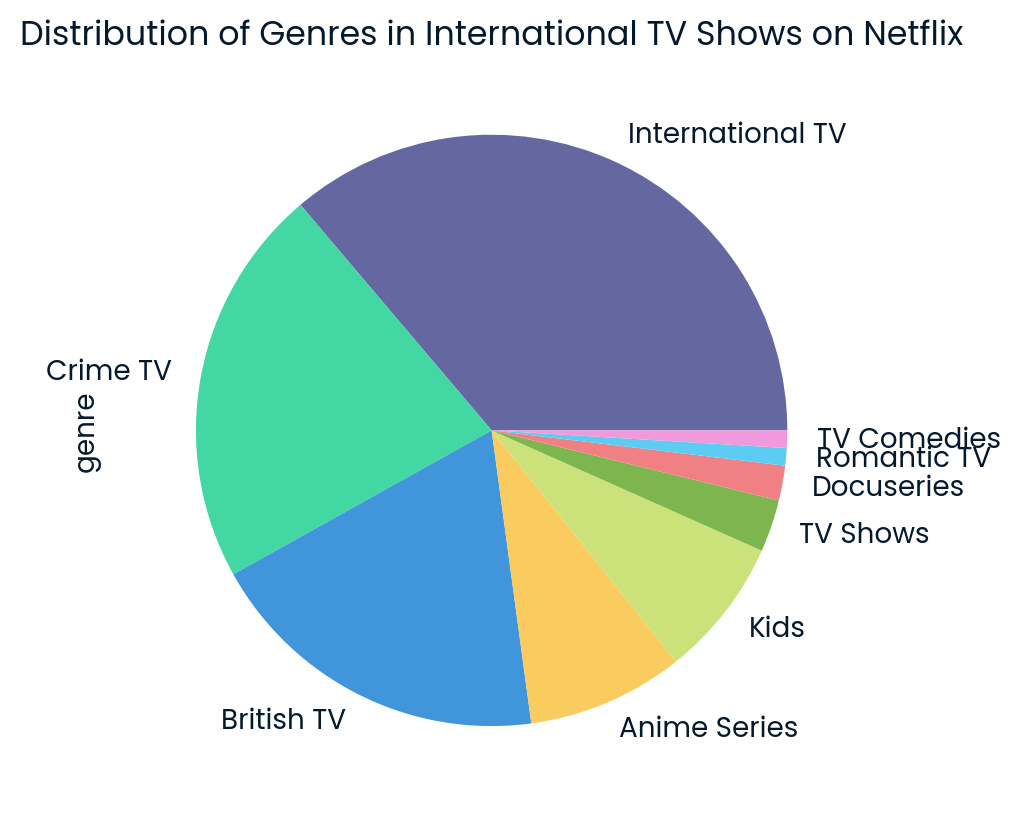

In [33]:
# Filter out shows from US 
international_shows = show_df[show_df["country"] != "United States"]

# see how many of each genre there are 
international_shows["genre"].value_counts()

# visualize as a pie chart 
international_shows["genre"].value_counts().plot(kind='pie', title = 'Distribution of Genres in International TV Shows on Netflix')

Interestingly, there seems to be some problems with genre labeling in our data set. Most TV shows originating in countries other than the US are labeled as "International TV", which does not provide any information about the actual genre content like other appropriate labels would (Crime, Romance, Comedy, etc.). This issue is compounded by a large portion of shows being labeled as "British TV", again failing to provide any information about genre content. I would even argue that "Anime Series" is not an accurate label, as animated shows can also fall into many different genre categories. 

Based on my additional analysis, I would recommend an overhaul of the genre category in the Netflix data set in order to extract more meaningful insights. 